Caelan Osman

Homework 10.14

January 23, 2022

In [2]:
import numpy as np
import pymc3 as pm
import arviz as az
from scipy.stats import beta
from matplotlib import pyplot as plt

### Exercise 10.14

/tmp/ipykernel_21003/1236307560.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


Part iii:


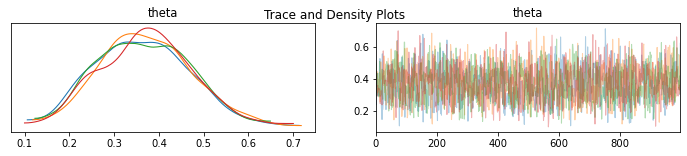

Part iv:
mean: 0.36806770056124277
median: 0.36539546279644464
variance: 0.010596955569704617
Part v:


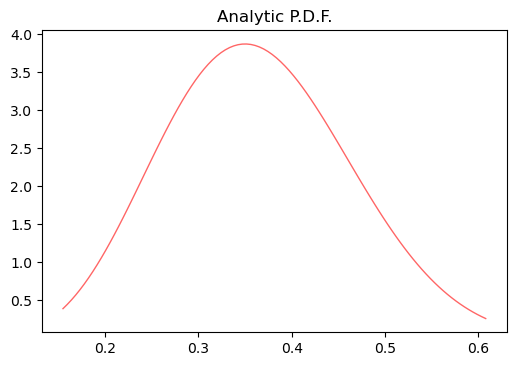

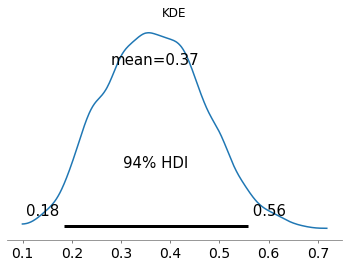

In [4]:
def problem10_14():
    
    #part 1
    #bernoulli draw
    x = np.random.binomial(1, 0.3, size=20)
    
    # part 2 
    with pm.Model() as bern_model:
        theta = pm.Beta('theta', alpha=1., beta=1.)
        y = pm.Bernoulli('y', p=theta, observed=x)
        trace = pm.sample(1000)
    
    with bern_model:
        #part 3
        print('Part iii:')
        az.plot_trace(trace, compact=False)
        plt.suptitle('Trace and Density Plots')
        plt.show()
        theta = trace['theta']
        
        #part 4
        print('Part iv:')
        print('mean:', np.mean(theta))
        print('median:', np.median(theta))
        print('variance:', np.var(theta))
        
        
        #part 5
        print('Part v:')
        fig = plt.figure()
        fig.set_dpi(100)
        ax = fig.add_subplot(111)
        
        xbar = np.sum(x)
        n = x.size
        d = np.linspace(beta.ppf(0.01, xbar+1, n-xbar+1), beta.ppf(0.99, xbar+1, n-xbar+1), 100)
        ax.plot(d, beta.pdf(d, xbar+1, n-xbar+1),'r-', lw=1, alpha=0.6)
        ax.set_title('Analytic P.D.F.')
        plt.show()
        
        az.plot_posterior(trace)
        plt.title('KDE')
        plt.show()
        
    
    return

problem10_14()

### part iii (convergence)
As we can see the density plots are similar for multiple chains, therefore they are approaching the stationary distribution. Furthermore, the trace plot looks like a "fuzzy catepillar" therefore, the consecutive steps in the Markov Chain are not strongly correlated. 

### part iv (comparison)
As we can see the true value for $\theta$ is pretty close to the mean/median of the posterior distribution. 

### part v (analytic computation)
Now we analytically compute the posterior distribution. 

\begin{align}
P(\theta | \boldsymbol{x}) &= \frac{\left[\prod_{i=1}^n f(x_i | \theta) \right] p(\theta)}{\int_0^1 \left[\prod_{i=1}^n f(x_i |\theta')\right] p(\theta') d\theta'} = \frac{1}{Z} \left[ \prod_{i=1}^n \theta^{x_i} (1 - \theta)^{1-x_i}  \right]\\
&= \frac{1}{Z}  \prod_{i=1}^n \theta^{x_i} \prod_{i=1}^n (1 - \theta)^{1-x_i}\\
&= \frac{1}{Z} \left(\theta^{\sum_{i=1}^n x_i} (1 - \theta)^{\sum_{i=1}^n x_i}\right)\\
&= \frac{1}{Z} \theta^{\overline{x} +1 - 1}(1 -\theta)^{n-\overline{x} +1 -1}
\end{align}

Where $\overline{x} = \sum_{i=1}^n x_i$ and the constant $Z$ is indpendent of $\theta$. 
The last equality is a constant times times the p.d.f. of the beta distribution (with $a = \overline{x}+1$ and $b = \overline{x}+1$. 

Because this is a p.d.f. and the beta distributions are p.d.f.s they must both integrate to one. 
Hence, this and the beta p.d.f. are the same function. 
Thus

\begin{align}
P(\theta |\boldsymbol{x}) \sim \operatorname{Beta}(\overline{x} +1, n-\overline{x}+1)
\end{align}

### Exercise 10.15

/tmp/ipykernel_21003/2890031396.py:20: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Part iii:


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


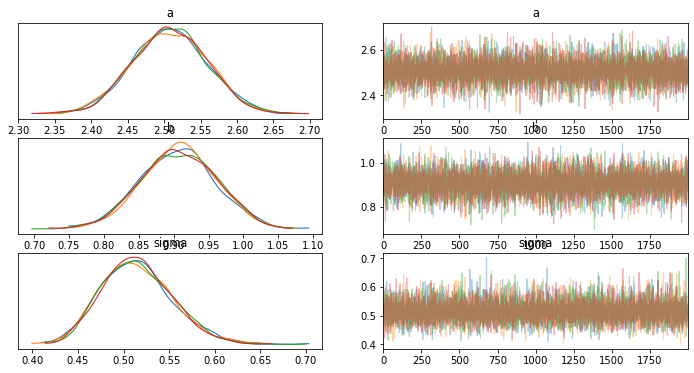


Part iv:
mean of a: 2.5076271672342627
mean of b: 0.9070185405212094
mean of σ: 0.5148379232619003

Part v:


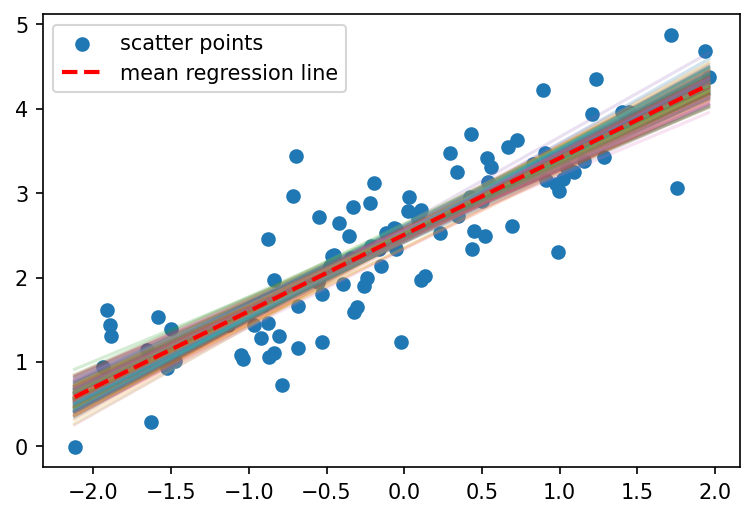

In [5]:
def problem10_15():
    
    #part 1
    #get data set
    x = np.random.normal(loc=0, scale=1, size=100)
    ϵ = np.random.normal(loc=0, scale= np.sqrt(1/4.), size=100)
    y = 2.5 + 0.9*x + ϵ 
    
    #part 2
    with pm.Model() as model:
        a = pm.Normal('a', mu=0, sd=10)
        b = pm.Normal('b', mu=0, sd=1)
        sigma = pm.HalfCauchy('sigma', 5)
        
        mu = a + b * x
        y_pred = pm.Normal('y_pred', mu=mu, sd=sigma, observed=y)
        
    with model:
        print('Part iii:')
        trace = pm.sample(2000, tune=1000)
        az.plot_trace(trace, compact=False)
        plt.show()
        
        #part 4
        a_param = trace['a']
        b_param = trace['b']
        σ_param = trace['sigma']
        
        print('\nPart iv:')
        print('mean of a:', np.mean(a_param))
        print('mean of b:', np.mean(b_param))
        print('mean of σ:', np.mean(σ_param))
        
        
        print('\nPart v:')
        random_sample = np.random.choice(np.arange(a_param.size), size=200, replace=False)
        subsample_a = a_param[random_sample]
        subsample_b = b_param[random_sample]
        
        line = lambda x: np.mean(b_param)*x + np.mean(a_param)
        dom = np.linspace(np.min(x), np.max(x), 20)
        
        fig = plt.figure()
        fig.set_dpi(150)
        ax = fig.add_subplot(111)
        ax.scatter(x, y, label='scatter points')
        for a, b in zip(subsample_a, subsample_b):
            ax.plot(dom, b*dom+a, alpha=0.2)
            
        ax.plot(dom, line(dom), 'r--', lw=2, label='mean regression line')
        ax.legend(loc='best')

        
        ax.plot()
        plt.show()
    
    return
problem10_15()

### part iii (convergence)
As we can see the density plots are similar for multiple chains, therefore they are approaching the stationary distribution. Furthermore, the trace plot looks like a "fuzzy catepillar" therefore, the consecutive steps in the Markov Chain are not strongly correlated. 

### part iv (comparison)

As we can see from the print out of part 4 up above, the distributions do a pretty good job of estimating the true values of $a = 2.5$, $b=0.9$, and $\sigma = 0.5$.